
# ISYS2407 Information Systems Solutions & Design

# Assignment 3

# Model 1

#### Student name: Rajbeer Kohli

#### Student number: s3798453

# 1 Import libraries

In [14]:
# Import the library for pickling
import joblib

# Library needed for counting categorical values
import collections

# Also need pandas here
import pandas as pd

import numpy as np
from sklearn.model_selection import GridSearchCV

# Library to scale values
from sklearn.preprocessing import StandardScaler

# Library for replacing labels with numbers
from sklearn.preprocessing import LabelEncoder

# Libary needed for onehot encoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
# Just use pandas get_dummies which is a lot easier to use

# Library for splitting the data into train and test sets
from sklearn.model_selection import train_test_split 

# Import the model library
from sklearn.linear_model import LogisticRegression

# Import the libraries for computing the metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

# Import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

# 2 Load the cleaned data

#### Pickled file must exist in your folder

In [15]:
# Load the pickled file
attrition_df = joblib.load('attrition-cleaned.pkl')  

# Check
attrition_df.head()

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_count,employee_number,environment_satisfaction,...,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition
0,41.0,Travel_Rarely,1102.0,Sales,1.0,2.0,Life Sciences,1.0,1.0,2.0,...,80.0,0.0,8.0,3.0,1.0,6.0,4.0,0.0,5.0,1
1,49.0,Travel_Frequently,279.0,Research & Development,8.0,1.0,Life Sciences,1.0,2.0,3.0,...,80.0,1.0,10.0,3.0,3.0,10.0,7.0,1.0,7.0,0
2,37.0,Travel_Rarely,1373.0,Research & Development,2.0,2.0,Other,1.0,4.0,4.0,...,80.0,0.0,7.0,3.0,3.0,0.0,0.0,0.0,0.0,1
3,33.0,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,1.0,5.0,4.0,...,80.0,0.0,8.0,3.0,3.0,8.0,7.0,3.0,0.0,0
4,27.0,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,7.0,1.0,...,80.0,1.0,6.0,3.0,3.0,2.0,2.0,2.0,2.0,0


# 3 Split the data into training and testing set

In [16]:
# Storing the features in variable X (uppercase as there are multiple features)

feature_cols = ['age', 
               'daily_rate', 
               'distance_from_home', 
               'education', 
               'employee_count', 
               'employee_number',
               'environment_satisfaction',             
               'hourly_rate',
               'job_involvement',
               'job_level',           
               'job_satisfaction',        
               'monthly_income',
               'monthly_rate',
               'num_companies_worked',
               'percent_salary_hike',
               'performance_rating',
               'relationship_satisfaction',
               'standard_hours',
               'stock_option_level',
               'total_working_years',
               'training_times_last_year',
               'work_life_balance',
               'years_at_company',
               'years_in_current_role',
               'years_since_last_promotion',
               'years_with_curr_manager']

X = attrition_df[feature_cols]
#print('X:\n', X)

# Store the labels/target in variable y (lower case as its a single value)
y = attrition_df['attrition']
#print('y:\n', y)

# Split into train/test set
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # keep 20% for testing
                                                    random_state=2 # pass an int for reproducible rtesult
                                                    )

# 4 Data Transformations to improve modelling performance

## 4.1 Scale the columns with continuous values

In [17]:
# 1. Select the columns to scale
# Make sure they are continuous columns as scaling is only for continuous values
# Better list all the columns and comment out the ones you don't need
columns_to_scale = ['age', 
               #'daily_rate', 
               'distance_from_home', 
               'education', 
               #'employee_count', 
               #'employee_number',
               'environment_satisfaction',             
               #'hourly_rate',
               #'job_involvement',
               'job_level',           
               'job_satisfaction',        
               'monthly_income',
               'monthly_rate',
               #'num_companies_worked',
               'percent_salary_hike',
               'performance_rating',
               #'relationship_satisfaction',
               #'standard_hours',
               'stock_option_level',
               'total_working_years',
               #'training_times_last_year',
               #'work_life_balance',
               'years_at_company',
               'years_in_current_role',
               'years_since_last_promotion',
               'years_with_curr_manager']

# 2. Make copy of the training and testing sets fix the issue below
# Warning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
X_train = X_train.copy()
X_test = X_test.copy()

# 3. Instantiate a scaler
scaler = StandardScaler()
    
# 4. Fit the scaler on the training column and transform the training and testing columns
# Use a loop to scale all the required columns    
for col in columns_to_scale:
    #print(col)
    # First fit the scaler to the column in the training data
    # Must reshape the numpy array returned b the scaler from 1D to 2D
    scaler.fit(X_train[col].values.reshape(-1, 1))
    # Then transform both the training and testing sets
    X_train[col] = scaler.transform(X_train[col].values.reshape(-1, 1))
    X_test[col] = scaler.transform(X_test[col].values.reshape(-1, 1))

# Check
print(X_train.shape, X_test.shape)

(1176, 26) (294, 26)


In [18]:
# Check again
X_train.head()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
285,0.020782,1372.0,-1.017288,0.092475,1.0,391.0,1.179219,42.0,3.0,-0.957328,...,2.0,80.0,-1.011021,1.066259,3.0,3.0,2.900775,2.401104,1.862234,0.886660
194,0.901489,1195.0,-0.893162,-0.878510,1.0,264.0,-1.572292,65.0,2.0,1.718943,...,4.0,80.0,0.505511,1.857377,1.0,3.0,-0.182432,1.198763,-0.226950,1.181796
323,-0.970013,1157.0,-0.893162,1.063459,1.0,440.0,-1.572292,84.0,1.0,-0.957328,...,4.0,80.0,-1.011021,-0.832422,4.0,2.0,-0.696300,-0.604749,0.295346,-0.589016
1015,-0.309483,560.0,-1.017288,1.063459,1.0,1431.0,1.179219,91.0,3.0,-0.957328,...,3.0,80.0,2.022043,-0.041305,2.0,3.0,-0.439366,-0.304164,-0.226950,-0.293880
1003,-1.300279,949.0,-1.017288,0.092475,1.0,1415.0,-1.572292,81.0,3.0,-0.957328,...,2.0,80.0,0.505511,-0.515975,2.0,2.0,-0.696300,-0.604749,-0.749246,-0.589016


In [19]:
# When checking the number of unique values, the blood pressure column was found to contain 47 values
# This is evidence that it's a continuous variable

# Some classification algorithms do not work well with continuous values - too many values
# So, depending on the classification algorithm you are usind, you might need to categorise these values
# How? Need some domain knowlege
# For blood pressure we could use the following:
# less than 80 = normal, between 80-89 = high, greater than 89 = very high

# Define a function to classify this
# Pass the whole dataframe as parameter
# And return a category (a word label but you could also return numeric labels)
# NOTE: Do not create too many categories as this will affect the learning algorithms
def income(df): 
    if df["monthly_income"] <= 3500:
        return "below_avg"
    elif df["monthly_income"] > 3500:
        return "above_average"

In [20]:
 # Apply the  previously defined function to the training set

# Use apply() to apply a lambda function for all the rows of the dataframe
# The lambda function calls the previously defined function bp_category()
# To which it passes the diabetes_df as parameter
# And a category is returned and saved in a new column named "blood_pressure_category"
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html
# the backslash is a line continuation character - there should be nothing after it, not even a space

# Warning: A value is trying to be set on a copy of a slice from a DataFrame.
# Try using .loc[row_indexer,col_indexer] = value instead
# Below is another fix - make a copy
X_train = X_train.copy()
X_train["monthly_income_category"] = \
    X_train.apply(lambda X_train:income(X_train), axis = 1) # axis=1 = row-wise

# The column "blood_pressure" is no longer needed and hence can be deleted 
X_train.drop(['monthly_income'], axis=1, inplace=True)

# Check
X_train.head()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,...,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,monthly_income_category
285,0.020782,1372.0,-1.017288,0.092475,1.0,391.0,1.179219,42.0,3.0,-0.957328,...,80.0,-1.011021,1.066259,3.0,3.0,2.900775,2.401104,1.862234,0.886660,below_avg
194,0.901489,1195.0,-0.893162,-0.878510,1.0,264.0,-1.572292,65.0,2.0,1.718943,...,80.0,0.505511,1.857377,1.0,3.0,-0.182432,1.198763,-0.226950,1.181796,below_avg
323,-0.970013,1157.0,-0.893162,1.063459,1.0,440.0,-1.572292,84.0,1.0,-0.957328,...,80.0,-1.011021,-0.832422,4.0,2.0,-0.696300,-0.604749,0.295346,-0.589016,below_avg
1015,-0.309483,560.0,-1.017288,1.063459,1.0,1431.0,1.179219,91.0,3.0,-0.957328,...,80.0,2.022043,-0.041305,2.0,3.0,-0.439366,-0.304164,-0.226950,-0.293880,below_avg
1003,-1.300279,949.0,-1.017288,0.092475,1.0,1415.0,-1.572292,81.0,3.0,-0.957328,...,80.0,0.505511,-0.515975,2.0,2.0,-0.696300,-0.604749,-0.749246,-0.589016,below_avg


In [21]:
# Apply the  previously defined function to the testing set
X_test = X_test.copy()
X_test["monthly_income_category"] = \
    X_test.apply(lambda X_test:income(X_test), axis = 1) # axis=1 = row-wise

# The column "blood_pressure" is no longer needed and hence can be deleted 
X_test.drop(['monthly_income'], axis=1, inplace=True)

# Check
X_test.head()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,...,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,monthly_income_category
721,1.451931,939.0,1.837621,0.092475,1.0,1005.0,1.179219,95.0,3.0,1.718943,...,80.0,0.505511,1.857377,2.0,3.0,1.616106,2.100518,-0.226950,0.296390,below_avg
843,-1.190190,1384.0,-0.769035,1.063459,1.0,1177.0,-1.572292,82.0,4.0,-0.957328,...,80.0,0.505511,-0.357752,2.0,3.0,0.588370,0.898177,-0.749246,0.886660,below_avg
627,1.672108,890.0,1.961748,1.063459,1.0,867.0,0.262049,81.0,2.0,1.718943,...,80.0,-1.011021,-0.041305,3.0,3.0,0.845304,1.198763,-0.749246,-1.179286,below_avg
1368,-0.309483,735.0,1.589368,1.063459,1.0,1932.0,0.262049,86.0,2.0,-0.065238,...,80.0,-1.011021,0.908036,3.0,3.0,2.386907,1.799933,2.384530,2.067201,below_avg
305,-0.089306,1105.0,1.837621,1.063459,1.0,419.0,-0.655122,47.0,3.0,-0.065238,...,80.0,0.505511,0.116919,3.0,3.0,0.845304,1.198763,-0.749246,1.181796,below_avg


In [22]:
# 1. Select the columns to one-hot encode
# Make sure the columns are categorical columns with multiple labels 
# It does not matter whether the labels are words or numbers
# Better list all the columns and comment out the ones you don't need
columns_to_onehot_encode = [
    #'num_pregnancies', 
    #'glucose', 
    #'blood_pressure', # this column no longer exists
    'monthly_income_category',
    #'skin_thickness',
    #'insulin', 
    #'bmi', 
    #'pedigree', 
    #'age'
]

# 2 Instantiate a one-hot encoder
#enc = OneHotEncoder() # No, this will generate strings, not numbers
enc = LabelBinarizer()

# 3. Fit the encoder on the training column and transform the training and testing columns
# Use a loop to label encode all the required columns 
for col in columns_to_onehot_encode:
    # Option 1. Using pandas (simpler than sklearn)
    ## Fix X_train
    dummies_df = pd.get_dummies(X_train[col], prefix="mic") # generate dataframe of dummies
    X_train.drop([col], axis=1, inplace=True) # drop original column
    X_train = pd.concat([X_train, dummies_df], axis=1) # concatenate both dataframes
    ## Fix X_test
    dummies_df = pd.get_dummies(X_test[col], prefix="mic")
    X_test.drop([col], axis=1, inplace=True)
    X_test = pd.concat([X_test, dummies_df], axis=1)
    
    # Option 2: Using sklearn    
    # First fit the encoder to the training data
    #enc.fit(X_train[col].values.reshape(-1, 1)) # need to reshape
    #X_train_array = enc.transform(X_train[col])
    #X_test_array = enc.transform(X_test[col])
    #print(X_train_array)
    #print(X_train_array)
    # numpy arrays generated - have no column names and don't know the order the codes were generated
    # need to write complex code to generate column names for variable number of columns
    # to be able to convert the numpy array to a daframe
    # Better use the pandas solution!
     
# Check
X_train.head()

,age,daily_rate,distance_from_home,education,employee_count,employee_number,environment_satisfaction,hourly_rate,job_involvement,job_level,...,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,mic_below_avg
285,0.020782,1372.0,-1.017288,0.092475,1.0,391.0,1.179219,42.0,3.0,-0.957328,...,80.0,-1.011021,1.066259,3.0,3.0,2.900775,2.401104,1.862234,0.886660,1
194,0.901489,1195.0,-0.893162,-0.878510,1.0,264.0,-1.572292,65.0,2.0,1.718943,...,80.0,0.505511,1.857377,1.0,3.0,-0.182432,1.198763,-0.226950,1.181796,1
323,-0.970013,1157.0,-0.893162,1.063459,1.0,440.0,-1.572292,84.0,1.0,-0.957328,...,80.0,-1.011021,-0.832422,4.0,2.0,-0.696300,-0.604749,0.295346,-0.589016,1
1015,-0.309483,560.0,-1.017288,1.063459,1.0,1431.0,1.179219,91.0,3.0,-0.957328,...,80.0,2.022043,-0.041305,2.0,3.0,-0.439366,-0.304164,-0.226950,-0.293880,1
1003,-1.300279,949.0,-1.017288,0.092475,1.0,1415.0,-1.572292,81.0,3.0,-0.957328,...,80.0,0.505511,-0.515975,2.0,2.0,-0.696300,-0.604749,-0.749246,-0.589016,1


# 5 Modelling

## 5.1 Initial/baseline model

### 5.1.1 Fit initial model

In [23]:
# Import the model library
from sklearn.ensemble import RandomForestClassifier

# Instantiate model and fit on training data
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Predict using test data
y_pred = rf_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0 0 0 0 0]


### 5.1.2 Evaluate model

accuracy: 0.8401360544217688
precision: 0.5454545454545454
recall: 0.125
F1 score: 0.20338983050847456
[[241   5]
 [ 42   6]]


<AxesSubplot:>

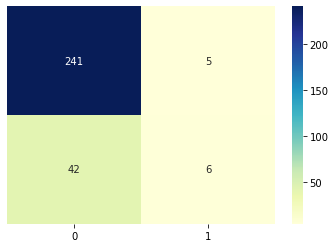

In [24]:
# Compute performance metrics of the baseline model

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}") 

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}") 

f1  = f1_score(y_test, y_pred)
print(f"F1 score: {f1 }") 

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
# Visualise the   confusion matrix
sns.heatmap(cf_matrix, annot=True, fmt="d", yticklabels=False, cmap="YlGnBu")


# Continue with the rest of the modelling steps - e.g.

## 5.2 Improved model

### 5.2.1 Use grid search to find best hyperameters (details in grid search notebook)

In [43]:
param_grid = [
    {"criterion": ["gini", 'entropy'], "n_estimators": range(1,20)}
]
# Instantiate a grid search object and fit it to the training data
clf = RandomForestClassifier()
grid = GridSearchCV(clf, param_grid, verbose=0, cv=5, scoring='f1')
grid.fit(X_train, y_train)
print(f"Best params: {grid.best_params_}, score: {grid.best_score_:0.1f}")

Best params: {'criterion': 'entropy', 'n_estimators': 3}, score: 0.3


### 5.2.2 Fit improved model

In [44]:
# Import the model library
from sklearn.ensemble import RandomForestClassifier

# Instantiate model and fit on training data
rf_model = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

# Predict using test data
y_pred = rf_model.predict(X_test)

# Quick check
print(y_pred[:5])

[0 0 0 0 0]


### 5.2.3 Evaluate  improved model

accuracy: 0.8435374149659864
precision: 0.5833333333333334
recall: 0.14583333333333334
F1   score: 0.23333333333333336
[[241   5]
 [ 41   7]]


<AxesSubplot:>

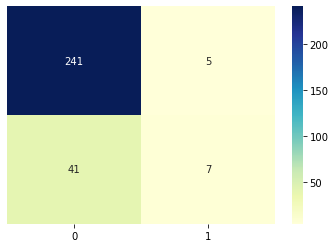

In [45]:
# 1.  Compute metrics

accuracy = accuracy_score(y_test, y_pred)
print(f"accuracy: {accuracy}")

precision = precision_score(y_test, y_pred)
print(f"precision: {precision}") 

recall = recall_score(y_test, y_pred)
print(f"recall: {recall}") 

f1  = f1_score(y_test, y_pred)
print(f"F1   score: {f1 }") 

cf_matrix = confusion_matrix(y_test, y_pred)
print(cf_matrix)
# Visualise the   confusion matrix
sns.heatmap(cf_matrix, annot=True   , fmt  ="d"  , yticklabels=False, cmap   ="YlGnBu")

# 6 Save the model for further evaluation (in another notebook)
#### Should also save the train/test sets

In [ ]:
# Pickle the model for later evaluation
joblib.dump(lr_model, 'model-1.pkl')  # # Use the right model name and a suitable file name

# Also need to pickle the training and testing sets
joblib.dump(X_train, 'X_train.pkl') 
joblib.dump(X_test, 'X_test.pkl') 
joblib.dump(y_train, 'y_train.pkl') 
joblib.dump(y_test, 'y_test.pkl')
